In [1]:
!pip install keras-tuner --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.7 MB/s eta 0:00:00


In [20]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
! kaggle datasets download -d atharvaingle/crop-recommendation-dataset

  0% 0.00/63.7k [00:00<?, ?B/s]
100% 63.7k/63.7k [00:00<00:00, 44.6MB/s]


In [22]:
! unzip /content/crop-recommendation-dataset.zip

Archive:  /content/crop-recommendation-dataset.zip
  inflating: Crop_recommendation.csv  


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tqdm 
import seaborn as sn
from sklearn import metrics, preprocessing, model_selection
import keras_tuner as kt

# Read the Data

In [24]:
dataset = pd.read_csv('/content/Crop_recommendation.csv')
dataset 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [25]:
# show the dataset information 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


# Preprocessing the Dataset 

In [26]:
# drop the na values 
dataset.dropna(inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 154.7+ KB


In [27]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'P'}>,
        <AxesSubplot:title={'center':'K'}>],
       [<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'ph'}>],
       [<AxesSubplot:title={'center':'rainfall'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

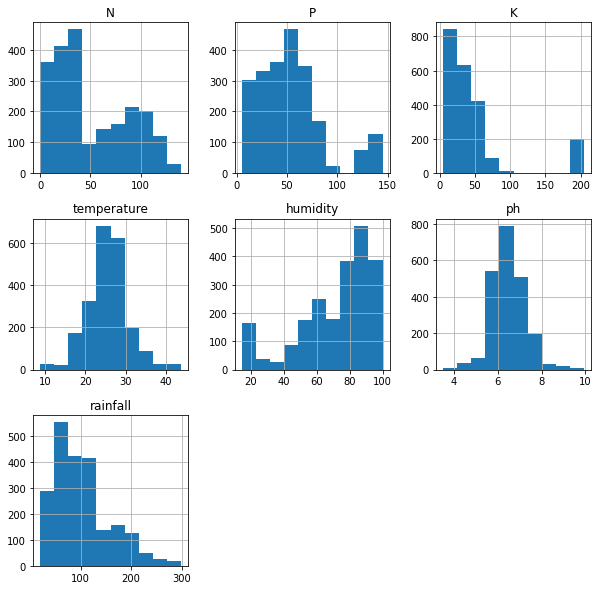

In [28]:
# plot the histogram 
dataset.hist(figsize=(10,10))

In [29]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [30]:
dataset

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [31]:
dataset 

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [32]:
dataset .iloc[0]

N                      90
P                      42
K                      43
temperature     20.879744
humidity        82.002744
ph               6.502985
rainfall       202.935536
label                rice
Name: 0, dtype: object

In [33]:

dataset.label=dataset.label.factorize()[0]

In [34]:
# split the data to features and labels 
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]


In [35]:
# scale the feature values between 0,1
min_max_preprocess =preprocessing.StandardScaler()
min_max_preprocess.fit(x)
x_norm=min_max_preprocess.transform(x)


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

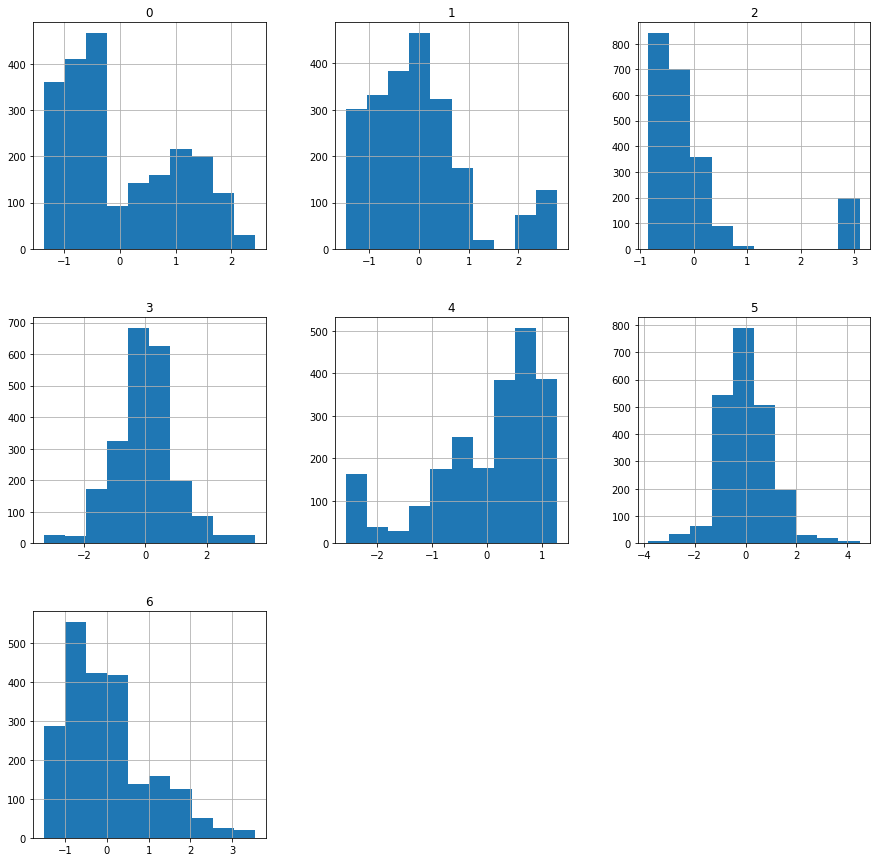

In [36]:
pd.DataFrame(x_norm).hist(figsize=(15,15))

(array([300., 200., 200., 200., 200., 200., 200., 200., 200., 300.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

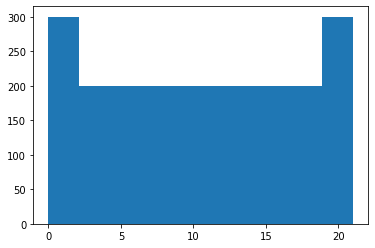

In [37]:
plt.hist(y)

In [38]:
len(set(y))

22

# Spilt the Data to Train & Test 

In [39]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x_norm,y,test_size=0.2,random_state=42,stratify=y)

In [40]:
y_train = tf.one_hot(y_train,depth=len(set(y)))
y_test = tf.one_hot(y_test,depth=len(set(y)))

# Create the Data Pipeline

In [41]:
# creat the data pipeline
def data_pipeline(x,y,batch_size=32):
    # insert the data to the data pipeline
    data=tf.data.Dataset.from_tensor_slices((x,y))
    data=data.shuffle(50000)# shuffle the data
    data=data.batch(batch_size)# creat the batch
    data=data.prefetch(tf.data.AUTOTUNE)# run the data processing and training in parallel 
    return data

In [42]:
# create the train pipeline 
train_dataset=data_pipeline(x_train,y_train)
# create the test pipeline
test_dataset=data_pipeline(x_test,y_test)

In [43]:
# get the first batch of data from the train pipeline 
for x,y in train_dataset.take(1):
    print(x)
    print(y)

tf.Tensor(
[[-0.74648083  2.56644686  2.90010459 -0.61732989  0.90845835 -0.87041564
   0.38088112]
 [ 0.98751628 -0.28390497 -0.1016875  -0.34397346  0.68785684  0.32212127
   1.34770894]
 [-0.31298155  2.7787071   3.01859638  2.19551769  0.40916672 -0.89676132
  -0.56821982]
 [ 1.6377652  -1.46649774 -0.02269297  0.47738749  0.89815365 -0.25205077
  -1.49755328]
 [ 0.14761143 -0.10196761  0.07605019  1.47568842  0.93312496  0.38888552
  -0.27906685]
 [-1.17998011 -1.13294593 -0.773141   -1.33067406  0.92373852  1.7375329
   0.20387866]
 [-0.82776195  0.2012613  -0.51640878  0.79688056 -1.28414424  0.52612115
   1.51892962]
 [-0.93613677  0.53481311 -0.47691151 -1.43898373 -1.48579875 -1.96844849
   0.65855102]
 [-0.36716896 -0.92068569 -0.7138951   1.16748682  0.8546948  -0.09592321
   0.17568708]
 [ 0.87914146  0.14061552 -0.06219024  0.02746461  0.54075325 -0.76785173
   2.5879826 ]
 [-0.0420445   0.565136   -0.6546492   1.17374913 -0.1638071   0.86270052
  -0.52040369]
 [-0.042044

# Model

In [44]:
class Model(tf.keras.Model):
    def __init__(self,units_tuner,activation_tuner,kernel_regularizer_tuner,dropout_tuner):
        super(Model,self).__init__()
        self.dropout_tuner=dropout_tuner
        activation_tuner=[tf.nn.relu,tf.nn.leaky_relu,tf.nn.elu][activation_tuner]


        self.D1=tf.keras.layers.Dense(units_tuner[0],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[0],name='D1')
        self.D1_dropout = tf.keras.layers.Dropout(0.3)
        self.D2=tf.keras.layers.Dense(units_tuner[1],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[1],name='D2')
        self.D2_dropout = tf.keras.layers.Dropout(0.3)
        self.D3=tf.keras.layers.Dense(units_tuner[2],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[2],name='D3')
        self.D3_dropout = tf.keras.layers.Dropout(0.3)
        self.D4=tf.keras.layers.Dense(units_tuner[3],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[3],name='D4')
        self.D4_dropout = tf.keras.layers.Dropout(0.3)
        self.D5=tf.keras.layers.Dense(units_tuner[4],activation=activation_tuner,kernel_regularizer=kernel_regularizer_tuner[4],name='D5')
        self.D5_dropout = tf.keras.layers.Dropout(0.3)
        self.out=tf.keras.layers.Dense(22,activation=tf.nn.softmax,name='out')
    def call(self,x ):
        x=self.D1(x)
        if self.dropout_tuner:
            x=self.D1_dropout(x)
        x=self.D2(x)
        if self.dropout_tuner:
            x=self.D2_dropout(x)
        x=self.D3(x)
        if self.dropout_tuner:
            x=self.D3_dropout(x)
        x=self.D4(x)
        if self.dropout_tuner:
            x=self.D4_dropout(x)
        x=self.D5(x)
        if self.dropout_tuner:
            x=self.D5_dropout(x)
        out = self.out(x)
        return out


In [45]:
def model_builder(hp):
    # define the kernel values tuner 
    units_tuner=[hp.Int('D1', min_value=8, max_value=512, step=32),
                  hp.Int('D2', min_value=8, max_value=512, step=32),
                  hp.Int('D3', min_value=8, max_value=512, step=32),
                  hp.Int('D4', min_value=8, max_value=512, step=32),
                  hp.Int('D5', min_value=8, max_value=512, step=32)]
                 
    # define the activation function tuner 
    activation_tuner = hp.Choice('activation',[0,1,2])

    # define the kernel_regularizer_tuner
    kernel_regularizer_tuner=[hp.Choice('regularizer_1',['L1','L2','L1L2']),
                              hp.Choice('regularizer_2',['L1','L2','L1L2']),
                              hp.Choice('regularizer_3',['L1','L2','L1L2']),
                              hp.Choice('regularizer_4',['L1','L2','L1L2']),
                              hp.Choice('regularizer_5',['L1','L2','L1L2']),
                              ]
    # define the dropout_tuner
    dropout_tuner= hp.Choice('dropout',[True,False])
    
    
    model = Model(
                      units_tuner=units_tuner,
                      activation_tuner=activation_tuner,
                      kernel_regularizer_tuner=kernel_regularizer_tuner,
                      dropout_tuner=dropout_tuner,
                     
                      )
    
    model.build((None,7))# build the model 
    
    # define the learning rate tuner 
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    # compile the model 
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=["accuracy"]
    )
    return model 

In [46]:
tuner = kt.Hyperband(model_builder,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [47]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


In [48]:
tuner.search(train_dataset, epochs=50,validation_data=test_dataset , callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]



Trial 30 Complete [00h 00m 07s]
val_loss: 3.299603223800659

Best val_loss So Far: 0.44748133420944214
Total elapsed time: 00h 02m 56s


In [49]:
best_hps

In [50]:
a=tuner.get_best_hyperparameters()[0]
a.values

{'D1': 360,
 'D2': 360,
 'D3': 104,
 'D4': 392,
 'D5': 168,
 'activation': 0,
 'regularizer_1': 'L1L2',
 'regularizer_2': 'L2',
 'regularizer_3': 'L2',
 'regularizer_4': 'L1L2',
 'regularizer_5': 'L2',
 'dropout': 0,
 'lr': 0.005117045969850107,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0012'}

## Model Evaluation 

In [51]:
#Get optimal hyperparameters and models from the tuner
model = tuner.hypermodel.build(tuner.get_best_hyperparameters()[0])

In [52]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 D1 (Dense)                  multiple                  2880      
                                                                 
 dropout_5 (Dropout)         multiple                  0 (unused)
                                                                 
 D2 (Dense)                  multiple                  129960    
                                                                 
 dropout_6 (Dropout)         multiple                  0 (unused)
                                                                 
 D3 (Dense)                  multiple                  37544     
                                                                 
 dropout_7 (Dropout)         multiple                  0 (unused)
                                                                 
 D4 (Dense)                  multiple                  4116

In [53]:
model.fit(train_dataset,epochs=50,validation_data=test_dataset)

Epoch 1/50
55/55 [==============================] - 2s 8ms/step - loss: 3.0729 - accuracy: 0.4744 - val_loss: 1.4822 - val_accuracy: 0.6955
Epoch 2/50
55/55 [==============================] - 0s 4ms/step - loss: 1.3942 - accuracy: 0.7057 - val_loss: 1.3225 - val_accuracy: 0.6636
Epoch 3/50
55/55 [==============================] - 0s 5ms/step - loss: 1.0611 - accuracy: 0.7710 - val_loss: 0.7936 - val_accuracy: 0.8068
Epoch 4/50
55/55 [==============================] - 0s 7ms/step - loss: 0.7720 - accuracy: 0.8489 - val_loss: 0.8220 - val_accuracy: 0.8455
Epoch 5/50
55/55 [==============================] - 0s 7ms/step - loss: 0.8710 - accuracy: 0.8358 - val_loss: 0.6484 - val_accuracy: 0.9091
Epoch 6/50
55/55 [==============================] - 0s 7ms/step - loss: 0.6354 - accuracy: 0.9091 - val_loss: 0.8779 - val_accuracy: 0.8273
Epoch 7/50
55/55 [==============================] - 0s 6ms/step - loss: 0.8328 - accuracy: 0.8517 - val_loss: 0.6577 - val_accuracy: 0.9136
Epoch 8/50
55/55 [==

<AxesSubplot:>

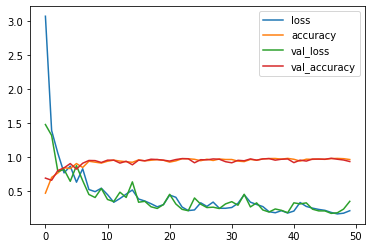

In [54]:
pd.DataFrame(model.history.history).plot()

In [55]:
preds=np.array([])
ys=np.array([])
for x,y in tqdm.tqdm(test_dataset):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    preds=np.append(preds,pred)
    y= np.argmax(y,axis=-1)
  
    ys=np.append(ys,y)
    
    
    
    

  0%|          | 0/14 [00:00<?, ?it/s]

1/1 [==============================] - 0s 119ms/step


  7%|▋         | 1/14 [00:00<00:02,  5.67it/s]

1/1 [==============================] - 0s 16ms/step


 21%|██▏       | 3/14 [00:00<00:00, 11.64it/s]

1/1 [==============================] - 0s 19ms/step


 36%|███▌      | 5/14 [00:00<00:00, 13.21it/s]

1/1 [==============================] - 0s 18ms/step


 50%|█████     | 7/14 [00:00<00:00, 14.83it/s]

1/1 [==============================] - 0s 17ms/step


 64%|██████▍   | 9/14 [00:00<00:00, 15.80it/s]

1/1 [==============================] - 0s 19ms/step


 79%|███████▊  | 11/14 [00:00<00:00, 16.15it/s]

1/1 [==============================] - 0s 16ms/step


 93%|█████████▎| 13/14 [00:00<00:00, 16.98it/s]

1/1 [==============================] - 0s 86ms/step


100%|██████████| 14/14 [00:01<00:00, 13.87it/s]


accuracy_score: 0.9386363636363636
precision_score: 0.9470120459250895
recall_score: 0.9386363636363636
f1_score: 0.9374458835050286


<AxesSubplot:>

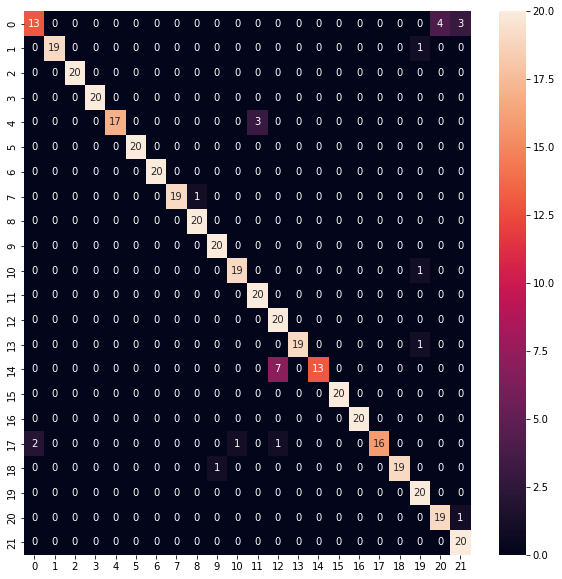

In [56]:
accuracy_score=metrics.accuracy_score(y_true=ys,y_pred=preds)
precision_score=metrics.precision_score(ys,preds,average='weighted')
recall_score=metrics.recall_score(ys,preds,average='weighted')
f1_score=metrics.f1_score(ys,preds,average='weighted')
confion_metrix=metrics.confusion_matrix(ys,preds)
print('accuracy_score:',accuracy_score)
print('precision_score:',precision_score)
print('recall_score:',recall_score)
print('f1_score:',f1_score)
plt.figure(figsize=(10,10))
sn.heatmap(confion_metrix,annot=True,)